In [4]:
import tarfile
import pandas as pd
from zipfile import ZipFile
from typing import List

In [5]:
def extract_csv_files(archive_path: str, headers: List[str]) -> pd.DataFrame:
    if archive_path.endswith(".tar.gz"):
        with tarfile.open(archive_path, "r:gz") as tar:
            output = pd.concat([pd.read_csv(tar.extractfile(file))
                               for file in tar.getnames()])

    if archive_path.endswith(".zip"):
        zip_file = ZipFile(archive_path)

        output = pd.concat([pd.read_csv(zip_file.open(csv_file), header=None)
                  for csv_file in zip_file.namelist()])
    
    output.columns = headers

    return output

In [6]:
traffic_file_archives = ["../data/citypulse_traffic_raw_data_aarhus_aug_sep_2014.tar.gz",
                         "../data/citypulse_traffic_raw_data_aarhus_oct_nov_2014.zip",
                         ]

headers = ["status", "avg_measured_time", "avg_speed",	"ext_id",
           "median_measured_time", "timestamp", "vehicle_count", "_id", "report_id"]

In [7]:
traffic_data = pd.concat([extract_csv_files(archive, headers)
                for archive in traffic_file_archives])

In [8]:
traffic_data.shape

(11520409, 9)

In [9]:
traffic_data.head()

,status,avg_measured_time,avg_speed,ext_id,median_measured_time,timestamp,vehicle_count,_id,report_id
0,OK,74,50,668,74,2014-08-01T07:50:00,5,20746220,158324
1,OK,73,50,668,73,2014-08-01T07:55:00,6,20746392,158324
2,OK,61,60,668,61,2014-08-01T08:00:00,4,20746723,158324
3,OK,61,60,668,61,2014-08-01T08:05:00,1,20747172,158324
4,OK,63,58,668,63,2014-08-01T08:10:00,3,20747545,158324


/opt/homebrew/anaconda3/envs/masters/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


timestamp               0
status                  0
avg_measured_time       0
avg_speed               0
ext_id                  0
median_measured_time    0
vehicle_count           0
_id                     0
report_id               0
dtype: int64

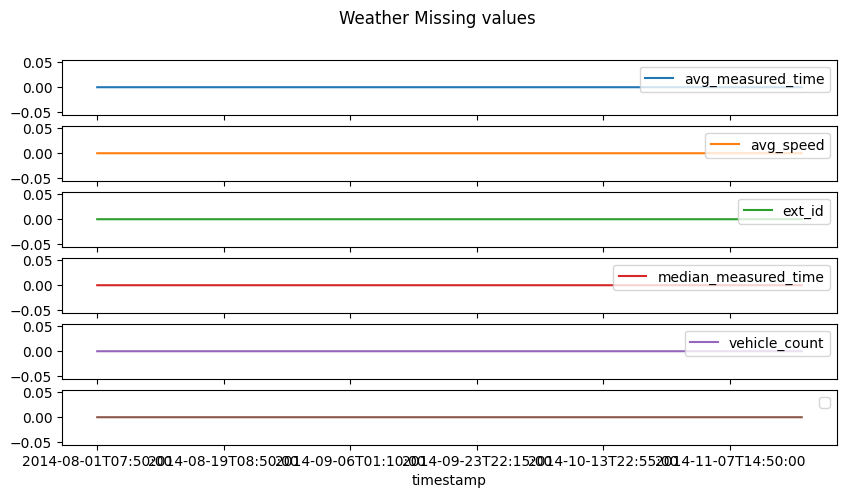

In [11]:
# Visualizing Missing files
traffic_data = traffic_data.drop('timestamp', axis = 1).isna().groupby(traffic_data.timestamp, sort = False).sum().reset_index()
traffic_data.plot(x='timestamp', 
                title="Weather Missing values",
                y=traffic_data.columns[2:-1], 
                subplots=True,
                figsize=(10,5))

traffic_data.isna().sum()

In [10]:
traffic_data.to_csv("../data/aarhus_traffic_data_aug_nov_2014.csv")